In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# install dataset

In [2]:
!pip install gdown 

In [3]:
!gdown --id 1mvp4iDG04sz8UPVEa2jt4KbsauVTBPW1

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1mvp4iDG04sz8UPVEa2jt4KbsauVTBPW1
From (redirected): https://drive.google.com/uc?id=1mvp4iDG04sz8UPVEa2jt4KbsauVTBPW1&confirm=t&uuid=416f56a4-0597-45ed-be69-99c61c693075
To: /kaggle/working/archive.zip
100%|████████████████████████████████████████| 330M/330M [00:05<00:00, 65.7MB/s]


In [4]:
import zipfile
import os


# Đường dẫn tới file zip đã tải sẵn trong Google Drive
zip_file_path = '/kaggle/working/archive.zip'

# Thư mục nơi bạn muốn giải nén nội dung
extracted_dir = '/kaggle/working/data'

# Kiểm tra xem thư mục đã được giải nén hay chưa
if not os.path.exists(extracted_dir):
    # Nếu chưa, thì tiến hành giải nén
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)
    print(f'Đã giải nén thành công.')
else:
    print(f'Thư mục đã tồn tại, không cần giải nén lại.')

Đã giải nén thành công.


In [5]:
# import PIL
# import io
# import os
# import cv2
# from base64 import b64decode, b64encode
# import numpy as np
# # used to store and load Python objects (e.g., trained models) to and from files, helps you store and reuse trained models.
# import pickle
# # provides many useful functions for copying, moving, renaming, deleting, and managing files and folders
# import shutil
# # used to create charts and visualize data. It can be used to plot the confusion matrix or other graph to display the results of the model.
# import seaborn as sn
# import pandas as pd
# import matplotlib.pyplot as plt
# import random
#  # provides functions for working with the operating system, such as creating directories, listing files, and managing paths
# from os import listdir
# from IPython.display import display, Javascript, Image
# # In classification problems, output data is often represented as a label
# # OneHotEncoder helps convert this label into a binary vector, helping the ML model to understand the output data.
# # LabelBinarizer often used in classification problems, it helps represent labels as binary vectors, each element of the vector corresponds to a class and only has value 0 or 1.
# from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
# # split the dataset into train data and test data
# from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
# # classification_report provides information such as accuracy, precision, recall, and F1-score for each class.
# # confusion_matrix helps you better understand how the model predicts wrong labels.
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score
# import keras
# # import the architecture of the VGG16 model from the Keras
# from keras.applications.vgg16 import VGG16
# # import layers (layers) of Keras, including input layer (Input),
# # Flatten layer (transform tensor to vector),
# # Dense layer (fully layer connected),
# # Dropout class (a class that randomly removes some units).
# from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, GlobalAveragePooling2D, MaxPool2D
# # Model class used to build neural network models.
# # load_model helps you load a stored model from a file.
# from keras.models import Model, load_model, Sequential
# # ModelCheckpoint is a callback that allows you to store the best model during training based on criteria like accuracy.
# from keras.callbacks import ModelCheckpoint
# # This class helps you generate additional data by applying transformations (augmentation) such as rotation, flip, and zoom to the training data set.
# from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical
# from keras.optimizers import Adam
# from keras.regularizers import l2
# # allows you to access and configure the Keras backend, such as TensorFlow or Theano, to adjust the settings for your neural network.
# from keras import backend as K
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [10]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Đường dẫn tới thư mục chứa dataset
dataset_path = '/kaggle/working/data'

# Lấy danh sách tên các thư mục con
subdirectories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Chia từng thư mục con thành train set, validation set, và test set
for subdir in subdirectories:
    subdir_path = os.path.join(dataset_path, subdir)

    # Lấy danh sách các file trong thư mục con
    file_names = os.listdir(subdir_path)
    print(subdir)

    # Chia thành train set, validation set, và test set
    train_set, temp_set = train_test_split(file_names, test_size=0.3, random_state=42)
    valid_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

    # Đường dẫn tới thư mục train set, validation set, và test set cho thư mục con
    train_set_path = os.path.join('/kaggle/working/train', subdir)
    valid_set_path = os.path.join('/kaggle/working/valid', subdir)
    test_set_path = os.path.join('/kaggle/working/test', subdir)

    # Tạo thư mục train set, validation set, và test set nếu chưa tồn tại
    os.makedirs(train_set_path, exist_ok=True)
    os.makedirs(valid_set_path, exist_ok=True)
    os.makedirs(test_set_path, exist_ok=True)
    print("Directories created:", train_set_path, valid_set_path, test_set_path)

    # Di chuyển các file của train set vào thư mục train_set_path
    for file_name in train_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(train_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

    # Di chuyển các file của validation set vào thư mục valid_set_path
    for file_name in valid_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(valid_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

    # Di chuyển các file của test set vào thư mục test_set_path
    for file_name in test_set:
        source_path = os.path.join(subdir_path, file_name)
        destination_path = os.path.join(test_set_path, file_name)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Error copying file: {e}")

sad
Directories created: /kaggle/working/train/sad /kaggle/working/valid/sad /kaggle/working/test/sad
disgust
Directories created: /kaggle/working/train/disgust /kaggle/working/valid/disgust /kaggle/working/test/disgust
contempt
Directories created: /kaggle/working/train/contempt /kaggle/working/valid/contempt /kaggle/working/test/contempt
neutral
Directories created: /kaggle/working/train/neutral /kaggle/working/valid/neutral /kaggle/working/test/neutral
happy
Directories created: /kaggle/working/train/happy /kaggle/working/valid/happy /kaggle/working/test/happy
surprise
Directories created: /kaggle/working/train/surprise /kaggle/working/valid/surprise /kaggle/working/test/surprise
anger
Directories created: /kaggle/working/train/anger /kaggle/working/valid/anger /kaggle/working/test/anger
fear
Directories created: /kaggle/working/train/fear /kaggle/working/valid/fear /kaggle/working/test/fear


# Exploratory Data Analysis (EDA)

## Let's visualize number of training examples for each food item

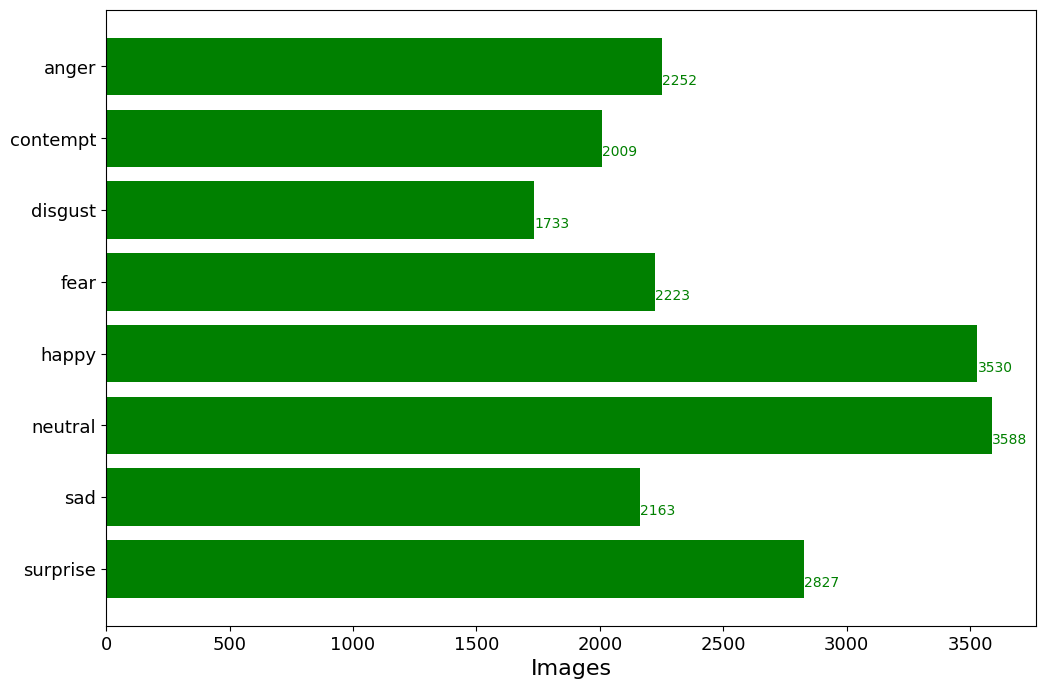

In [18]:
main='/kaggle/working/train/'

data=dict()

for i in sorted(os.listdir(main), reverse=True):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count


keys = data.keys()
values = data.values()

colors=["red" if x<= 1500 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Let's visualize our dataset by randomly picking an image from every class

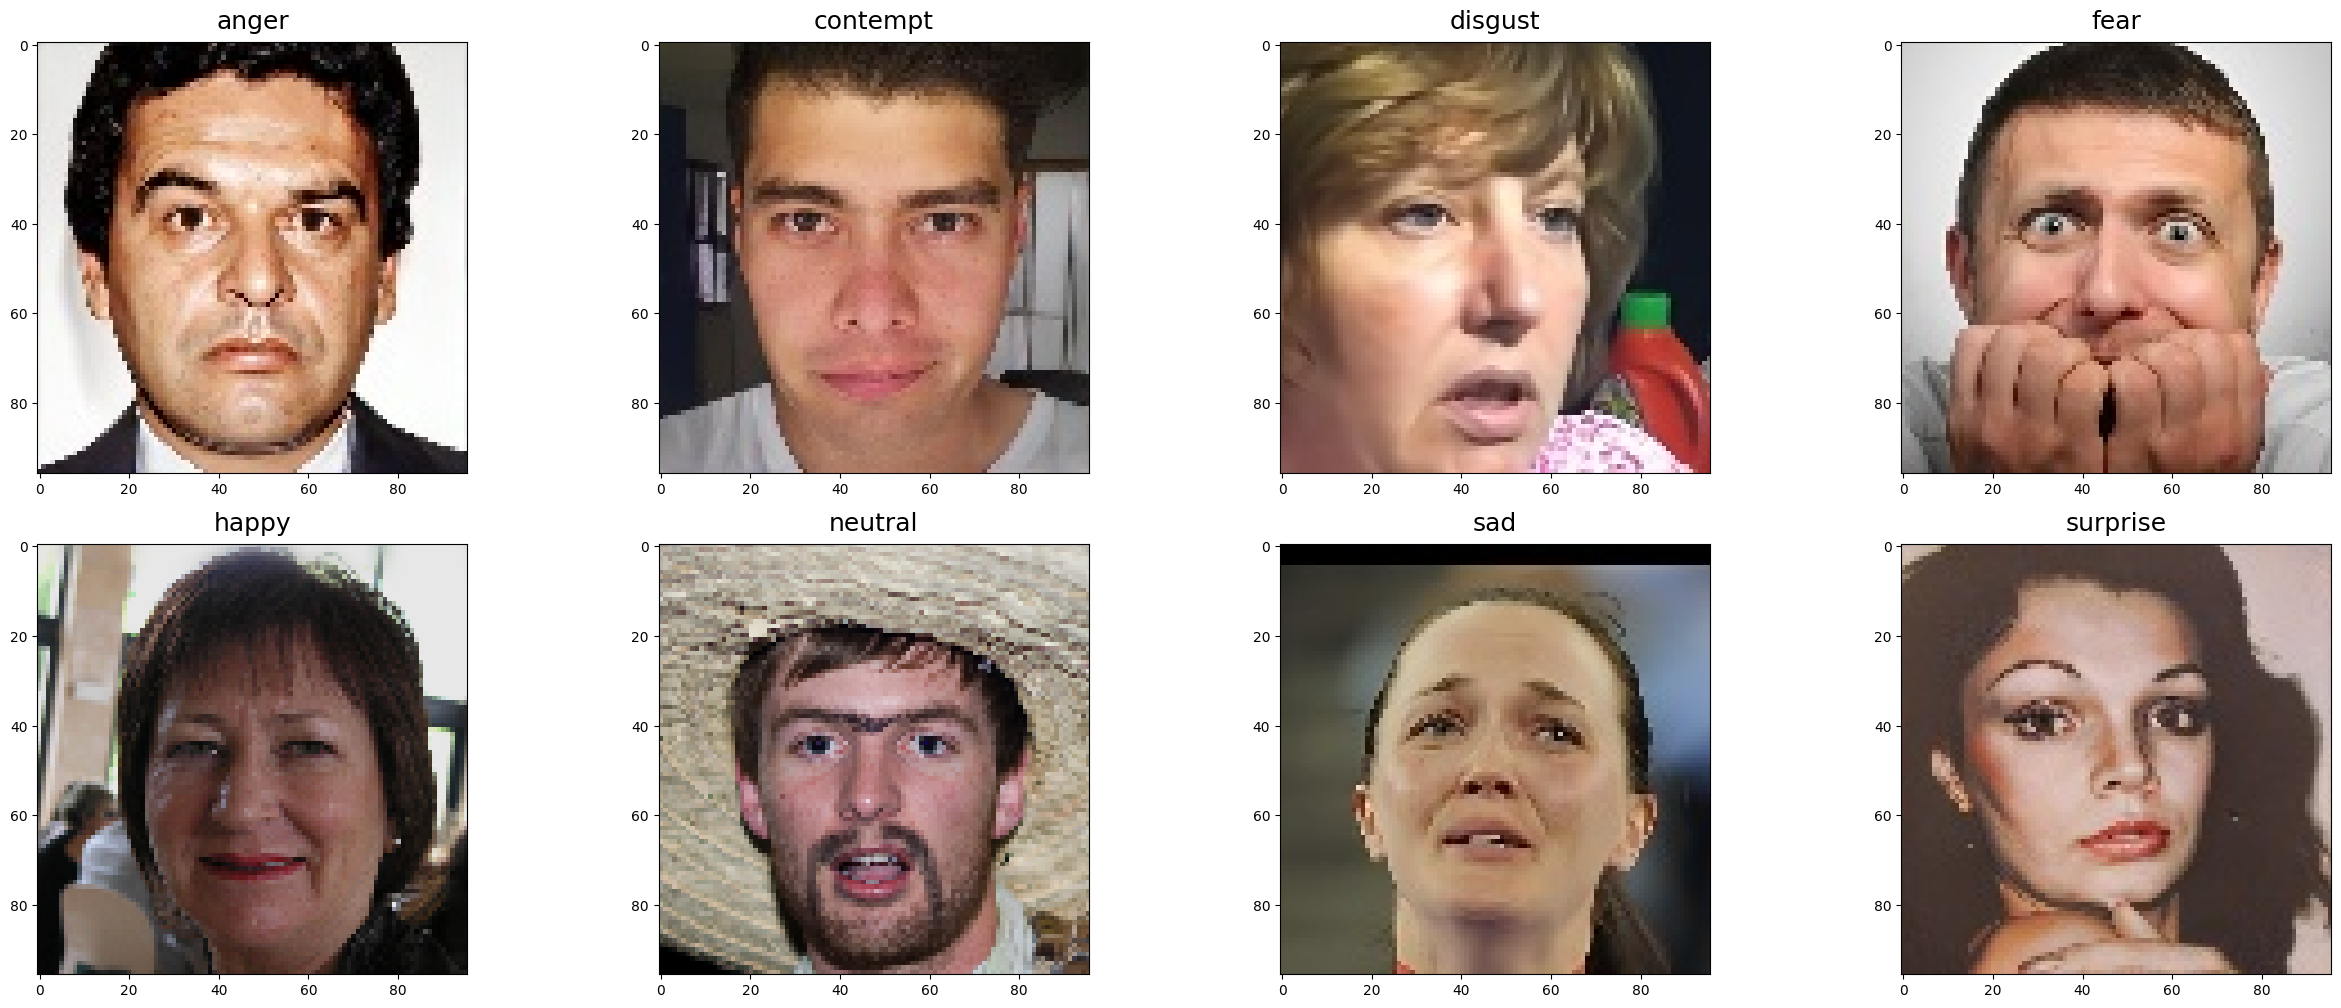

In [19]:
import random

train_folder = '/kaggle/working/train/'
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

# MODEL TRAINING

In [20]:
n_classes = 8
batch_size = 32
learning_rate = 0.0002
momentum = 0.9
epochs = 50

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 299, 299

train_data_dir = '/kaggle/working/train'

# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 20,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.2,1.0],
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_data_dir = '/kaggle/working/valid'

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 20325 images belonging to 8 classes.
Found 4358 images belonging to 8 classes.


In [22]:
class_map = train_generator.class_indices
class_map

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7}

In [24]:
total_train_samples = len(train_generator.filenames)
total_validation_samples = len(val_generator.filenames)

In [25]:
steps_per_epoch = total_train_samples // batch_size
validation_steps = total_validation_samples // batch_size

In [26]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

In [19]:
# model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
# x = model_vgg16_conv.output
# # Thêm lớp Global Average Pooling
# x = GlobalAveragePooling2D()(x)

# # Them cac layer FC va Dropout
# x = Dense(512, activation='relu', name='fc1')(x)
# x = Dropout(0.3)(x)
# x = Dense(512, activation='relu', name='fc2')(x)
# x = Dropout(0.5)(x)

# predictions = Dense(n_classes,kernel_regularizer=l2(0.005), activation='softmax')(x)
# model = Model(inputs=model_vgg16_conv.input, outputs=predictions)
# model.compile(optimizer=Adam(learning_rate = learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [27]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=learning_rate, momentum=momentum), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [20]:
# checkpointer = ModelCheckpoint(filepath='v1_VGG16', verbose=1, save_best_only=True)
# csv_logger = CSVLogger('history_v1_VGG16.log')

# history = model.fit(train_generator,
#                     steps_per_epoch = steps_per_epoch,
#                     validation_data=val_generator,
#                     validation_steps=validation_steps,
#                     epochs=epochs,
#                     verbose=1,
#                     callbacks=[csv_logger, checkpointer])

Epoch 1/50
635/635 [==============================] - ETA: 0s - loss: 21.5329 - accuracy: 0.2051
Epoch 1: val_loss improved from inf to 2.04800, saving model to v1_VGG16
635/635 [==============================] - 106s 143ms/step - loss: 21.5329 - accuracy: 0.2051 - val_loss: 2.0480 - val_accuracy: 0.2314
Epoch 2/50
635/635 [==============================] - ETA: 0s - loss: 128.1902 - accuracy: 0.2523
Epoch 2: val_loss did not improve from 2.04800
635/635 [==============================] - 87s 137ms/step - loss: 128.1902 - accuracy: 0.2523 - val_loss: 2.1037 - val_accuracy: 0.1668
Epoch 3/50
635/635 [==============================] - ETA: 0s - loss: 5755.6865 - accuracy: 0.1711
Epoch 3: val_loss improved from 2.04800 to 1.97631, saving model to v1_VGG16
635/635 [==============================] - 91s 143ms/step - loss: 5755.6865 - accuracy: 0.1711 - val_loss: 1.9763 - val_accuracy: 0.2470
Epoch 4/50
635/635 [==============================] - ETA: 0s - loss: 26621.0762 - accuracy: 0.1710



KeyboardInterrupt



In [28]:
checkpointer = ModelCheckpoint(filepath='v1_inceptionV3', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_v1_inceptionV3.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

Epoch 1/50
635/635 [==============================] - ETA: 0s - loss: 1.2600 - accuracy: 0.5330
Epoch 1: val_loss improved from inf to 1.15814, saving model to v1_inceptionV3
635/635 [==============================] - 507s 758ms/step - loss: 1.2600 - accuracy: 0.5330 - val_loss: 1.1581 - val_accuracy: 0.5912
Epoch 2/50
635/635 [==============================] - ETA: 0s - loss: 0.9899 - accuracy: 0.6448
Epoch 2: val_loss improved from 1.15814 to 0.91493, saving model to v1_inceptionV3
635/635 [==============================] - 477s 751ms/step - loss: 0.9899 - accuracy: 0.6448 - val_loss: 0.9149 - val_accuracy: 0.6631
Epoch 3/50
635/635 [==============================] - ETA: 0s - loss: 0.9052 - accuracy: 0.6766
Epoch 3: val_loss did not improve from 0.91493
635/635 [==============================] - 449s 706ms/step - loss: 0.9052 - accuracy: 0.6766 - val_loss: 1.0848 - val_accuracy: 0.6204
Epoch 4/50
635/635 [==============================] - ETA: 0s - loss: 0.8518 - accuracy: 0.6972
Ep

# Saving the model

In [29]:
model.save('model_v1_inceptionV3.h5')

## Accuracy and Loss curves

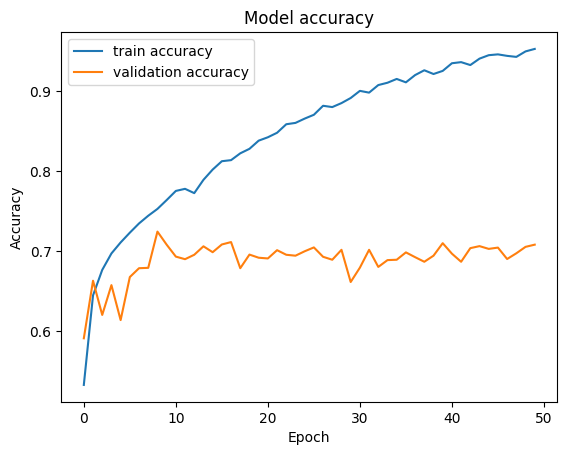

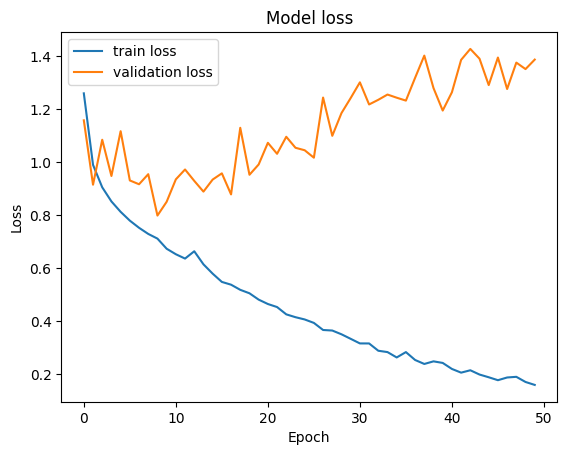

In [30]:
def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(history)
plot_loss(history)

# <b> PREDICTIONS </b>

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

In [32]:
K.clear_session()
path_to_model='./model_v1_inceptionV3.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


## Testing model on test set

In [33]:
test_data_dir = '/kaggle/working/test'

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 4359 images belonging to 8 classes.


In [34]:
scores = model.evaluate_generator(test_generator)

print("Test Accuracy: {:.3f}".format(scores[1]))

Test Accuracy: 0.703


## Function to predict single image or predict all images from a directory

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [36]:
category={
    0: ['anger','Anger'], 1: ['contempt','Contempt'], 2: ['disgust','Disgust'], 3: ['fear', 'Fear'], 4: ['happy', 'Happy'],
    5: ['neutral','Neutral'], 6:['sad','Sad'], 7: ['surprise','Surprise']
}

In [38]:
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)

def predict_dir(filedir,model):
    cols=15
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    fig=plt.figure(1, figsize=(25, 25))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)[0]
        if pred==true:
            pos+=1

        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=12)
        plt.imshow(img_array)

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

- <h3> Single image prediction </h3>

1/1 [==============================] - 2s 2s/step


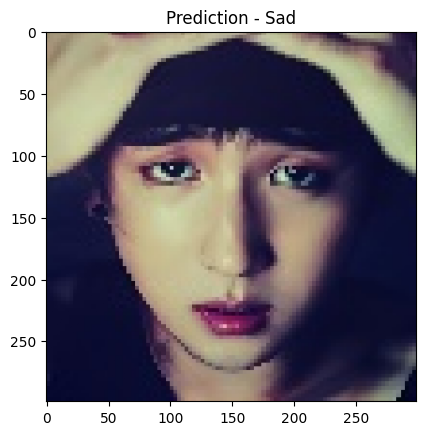

In [39]:
predict_image('/kaggle/working/test/sad/image0016989.jpg',model)

1/1 [==============================] - 0s 28ms/step


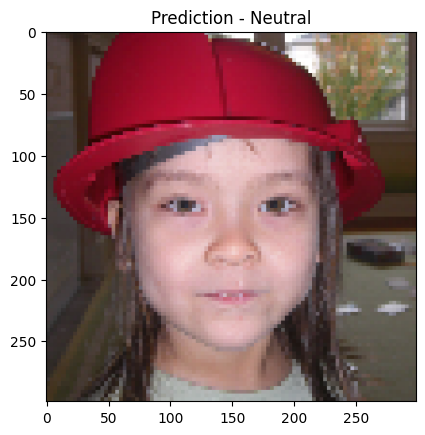

In [40]:
predict_image('/kaggle/working/test/neutral/ffhq_519.png',model)

1/1 [==============================] - 0s 31ms/step


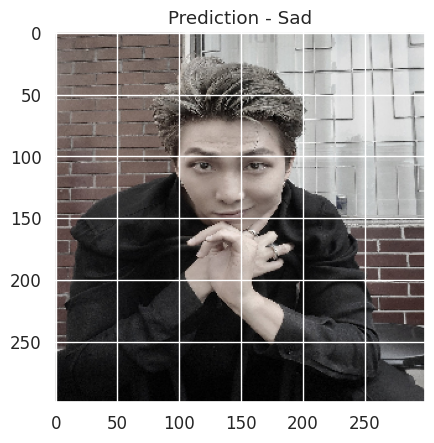

In [46]:
predict_image('/kaggle/input/anh-chang-kinh-bi/Anh-khinh-bi-trai-han.jpg',model)

1/1 [==============================] - 0s 25ms/step
Accuracy of Test : 0.59 (218/372)


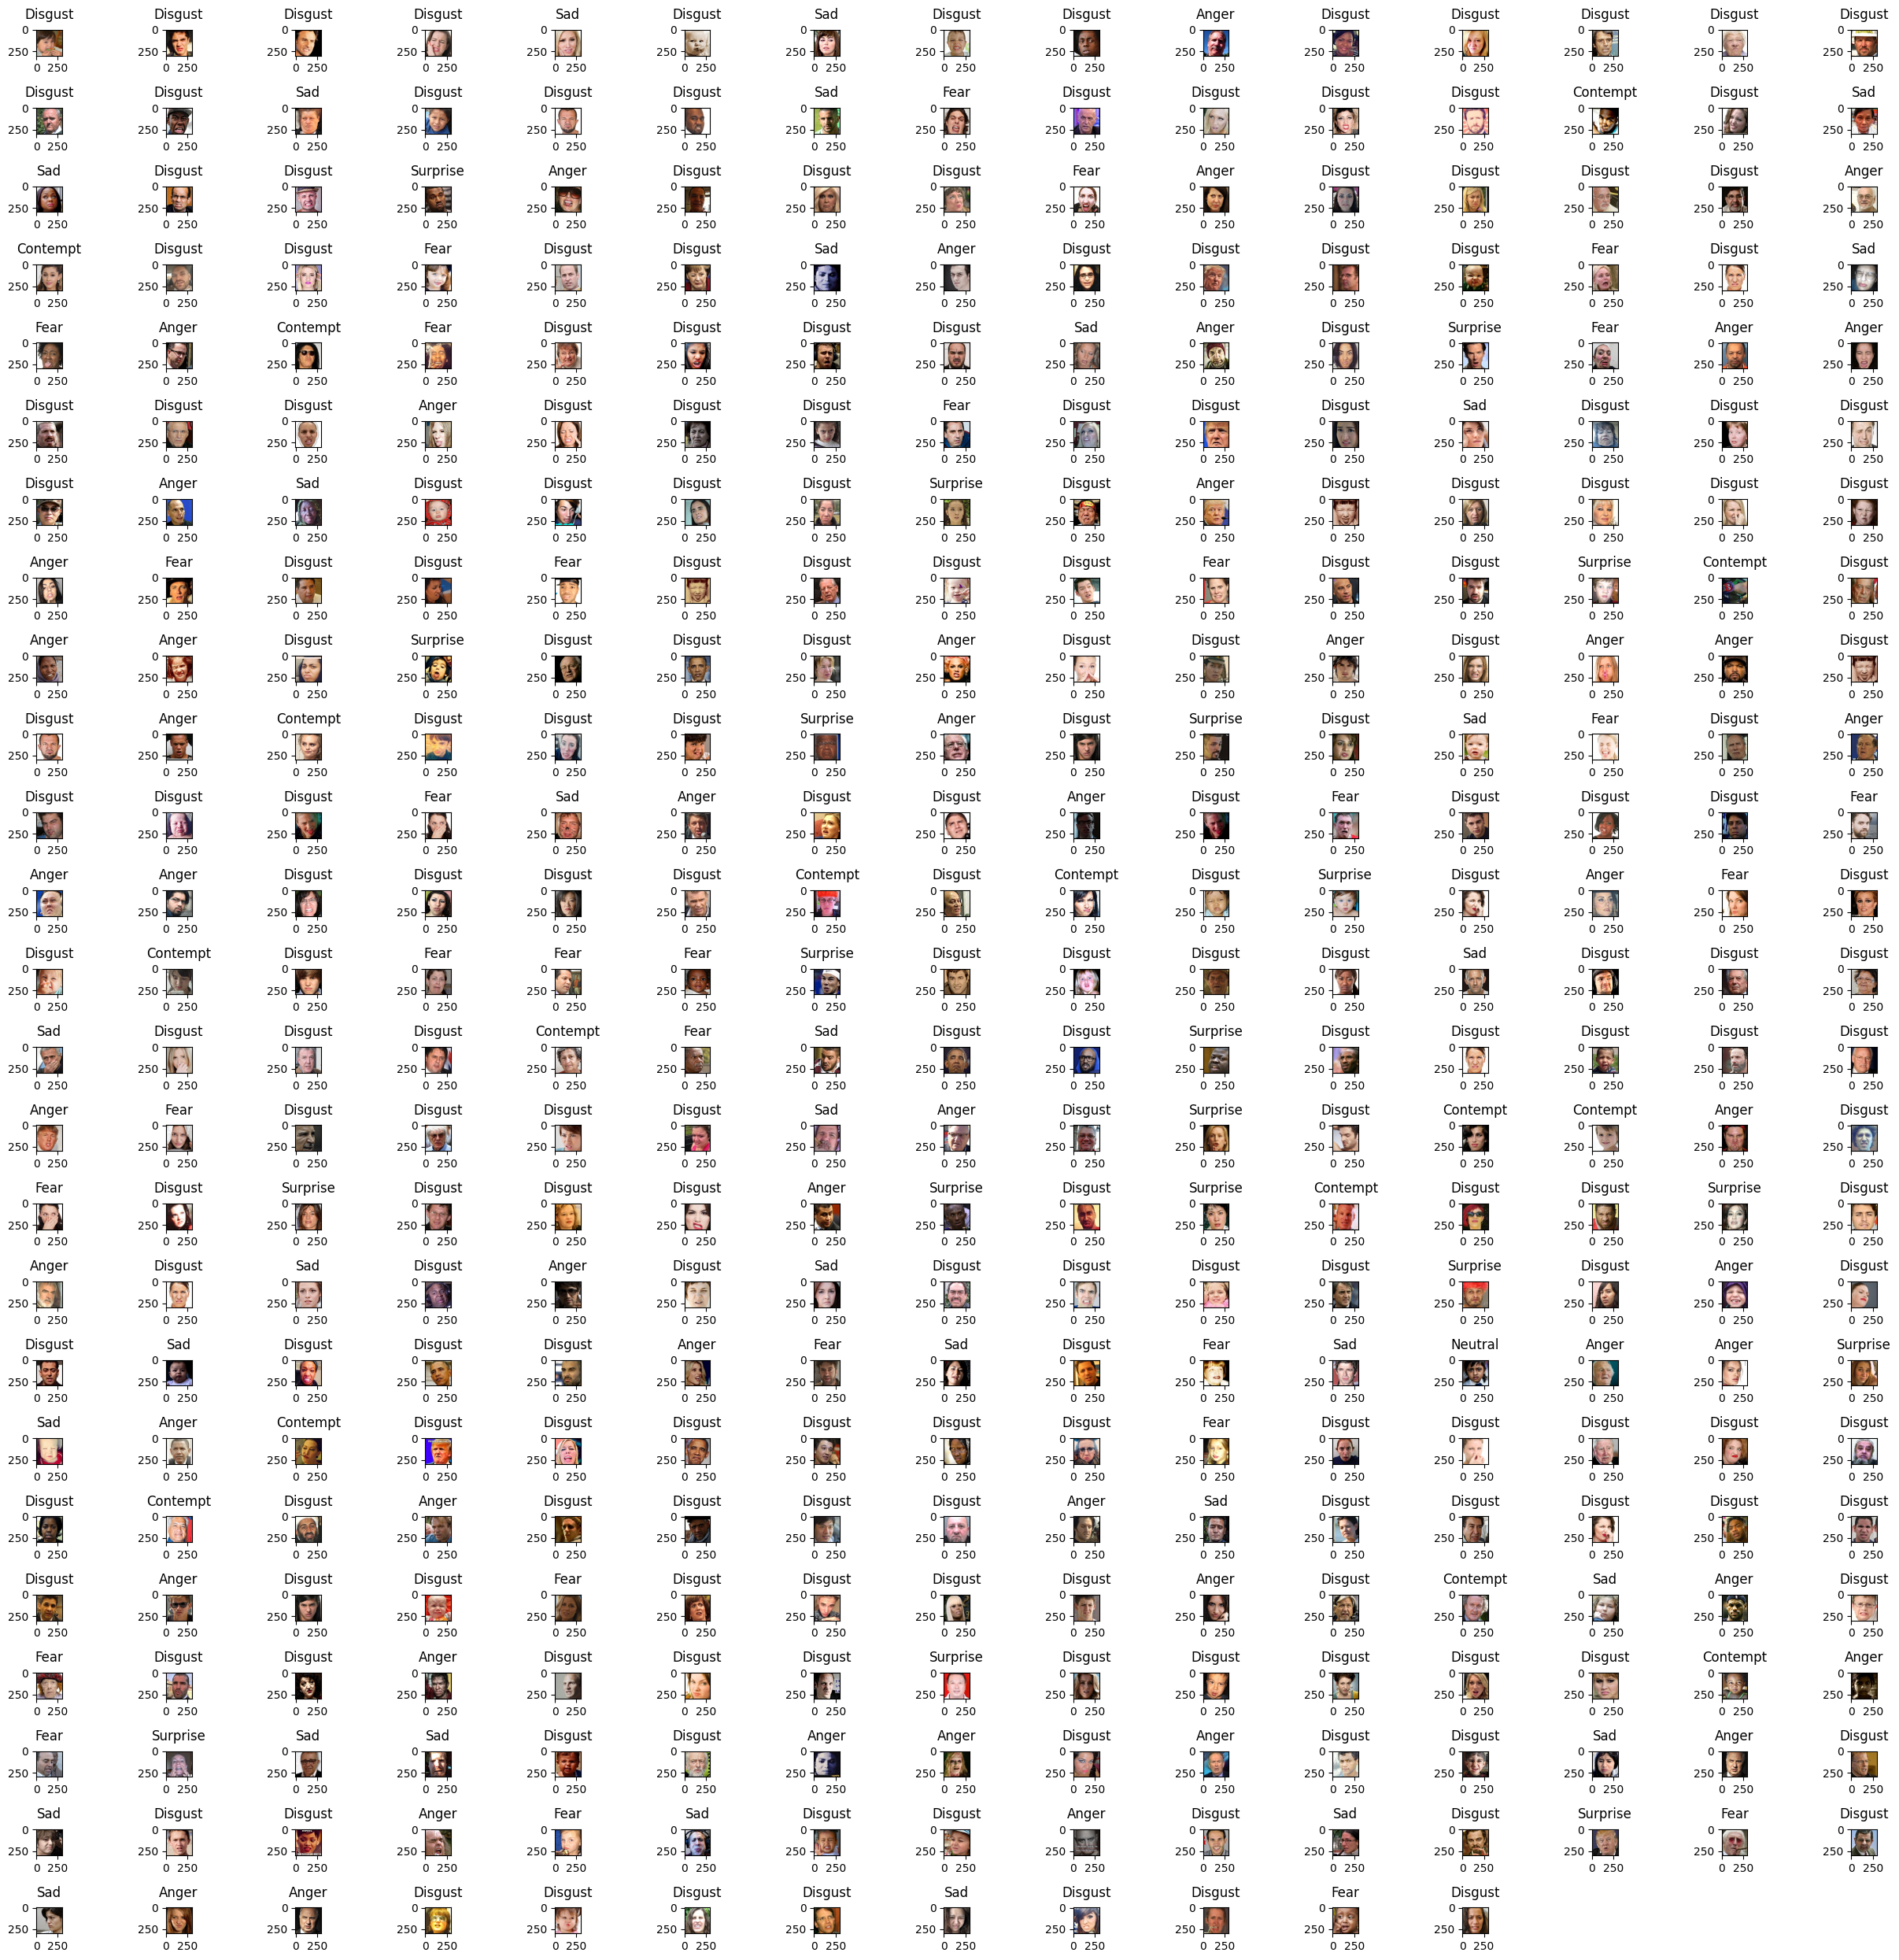

In [41]:
predict_dir("/kaggle/working/test/disgust",model)

## Let's plot a confusion matrix for all the food items

In [42]:
from sklearn.metrics import confusion_matrix
import itertools

img_width, img_height = 299, 299

def labels_confusion_matrix():
    folder_path="/kaggle/working/test"

    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i

    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]

        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(img_height, img_width))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0)
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)

    return (real,predicted)

def print_confusion_matrix(real, predicted, category):
    cmap = "viridis"

    # Lấy danh sách nhãn từ dictionary 'category'
    labels = [category[i][1] for i in range(len(category))]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    sns.set(font_scale=1.1)  # for label size
    plt.figure(figsize=(12, 8))  # Thay đổi kích thước của hình ảnh

    # Điều chỉnh kích thước biểu đồ bằng param 'cbar_kws'
    s = sns.heatmap(df_cm, annot=True, fmt='d', cmap=cmap, cbar_kws={"shrink": 0.6})  # Sử dụng fmt='d'
    
    plt.xticks(rotation=90)

    # Tùy chọn, đặt tỷ lệ khung hình cho matrix
    s.set_aspect('equal', adjustable='box')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

1/1 [==============================] - 0s 29ms/step


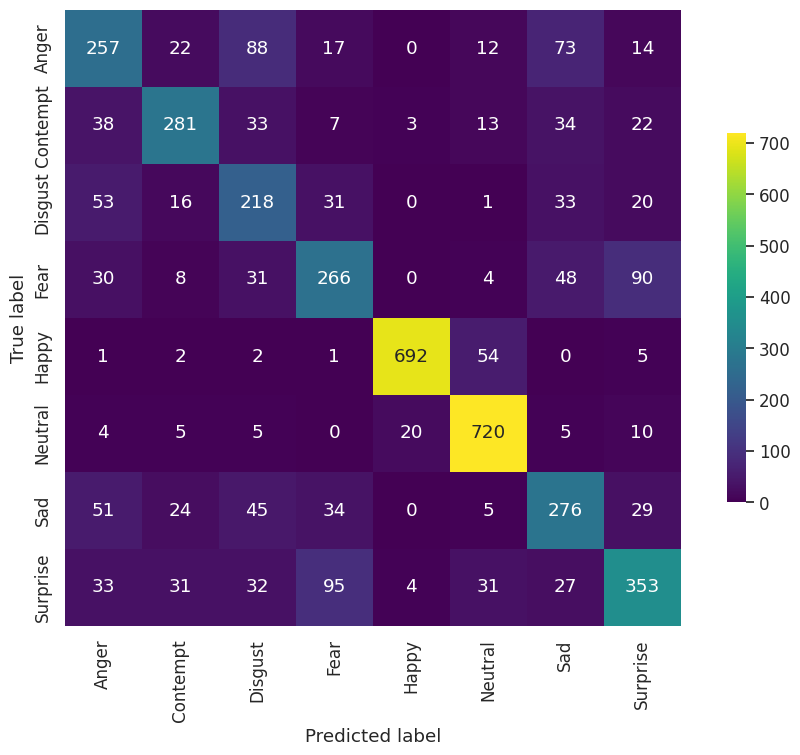

In [43]:
y_true,y_pred=labels_confusion_matrix()
print_confusion_matrix(y_true,y_pred, category)